# Bulldozer Price Prediction Machine Learning Project

#### This project aims to predict the price of buldozers put up for option based on Specification factors.

**Data**

This project uses data obtained from Kaggle's Blue book for Bulldozers competition:
https://www.kaggle.com/c/bluebook-for-bulldozers/data
It features multiple training and test set that have already be split for immediate use and benchmarks for gauging our performance.

**Evaluation:**

Our metric of success is the RMSLE or root mean squared log error. 
We want to post a RMSLE smaller than the median benchmark provided by kaggle minimize it RMSLE as much as possible.

**Features**

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale



## Data Exploration (EDA)

#### Exploring the data features prior to modelling and testing.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [123]:
train_validation_df = pd.read_csv('C:\\Users\\fritz\\Documents\\DataBases\\bluebook-for-bulldozers\\TrainAndValid.csv',
                                 low_memory=False)
train_validation_df.shape

(412698, 53)

In [124]:
train_validation_df.head(5)

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand         saledate  ...  \
0                      68.0       Low  11/16/2006 0:00  ...   
1                    4640.0       Low   3/26/2004 0:00  ...   
2                    2838.0      High   2/26/2004 0:00  ...   
3                    3486.0      High   5/19/2011 0:00  ...   
4                     722.0    Medium   7/23/2009 0:00  ...   

  Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer Grouser_Type  \
0                     NaN          NaN   NaN             NaN          NaN   
1                     NaN          NaN   NaN             NaN          NaN   
2                     NaN          NaN   NaN             NaN          NaN   
3                     NaN          NaN   NaN             NaN          NaN   
4                     NaN          NaN   NaN             NaN          NaN   

  Backhoe_Mounting Blade_Type Travel_Controls Differential_Type  \
0              NaN        NaN             NaN          Standard   
1              NaN        NaN             NaN          Standard   
2              NaN        NaN             NaN               NaN   
3              NaN        NaN             NaN               NaN   
4              NaN        NaN             NaN               NaN   

  Steering_Controls  
0      Conventional  
1      Conventional  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 53 columns]

In [125]:
train_validation_df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

 Most of our data is object type and we have a datetime column that hasn't been parsed.
    
After reloading the data set with parsed dates, we need to seriously consider how we will break down these categorical object columns.

In [3]:
train_validation_df = pd.read_csv('C:\\Users\\fritz\\Documents\\DataBases\\bluebook-for-bulldozers\\TrainAndValid.csv',
                                 low_memory=False,
                                 parse_dates=['saledate'])
train_validation_df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [4]:
dir(train_validation_df.saledate.dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_

In [15]:
df = train_validation_df.copy()
# or you can create a month reference column:
df['month'] = df.saledate.dt.month
# Set the months of each season
month_set= [[12, 1, 2], [3, 4, 5], [ 6, 7, 8], [9, 10, 11]]
seasons = ['winter', 'spring', 'summer', 'autumn']
def month_to_season(month):
    for i in range(len(month_sets)):
        if month in month_set[i]:
            return seasons[i]
df['Season'] = df.month.apply(month_to_season)
df[['Season', 'month']][:10]

Season  month
0  autumn     11
1  spring      3
2  winter      2
3  spring      5
4  summer      7
5  winter     12
6  summer      8
7  autumn     11
8  summer      8
9  summer      8

In [127]:
# The saledate column has been cleaned, let's see if there are null values
train_validation_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

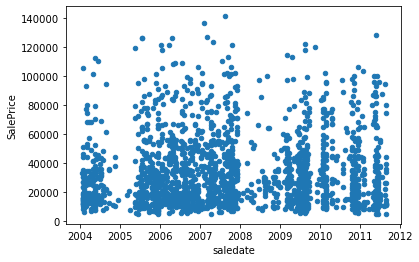

In [128]:
train_validation_df[:2000].plot.scatter(x='saledate', y='SalePrice')

It appears that there are sales patterns within the year, with cycles of high and low sales.

In [129]:
# Let's create a more detailed datetime info
test_df = train_validation_df.copy()
test_df['saleyear']= test_df.saledate.dt.year
test_df['salemonth']= test_df.saledate.dt.month
test_df['salequarter'] =test_df.saledate.dt.quarter
test_df['salequarterend'] =test_df.saledate.dt.is_quarter_end
test_df['salequarterstart'] =test_df.saledate.dt.is_quarter_start
test_df['saleyearend']= test_df.saledate.dt.is_year_end
test_df['saleyearstart']= test_df.saledate.dt.is_year_start

In [130]:
# We still have many object type columns that need to be converted into a data type sklearn can process.
for label, value in test_df.items():
    if value.dtype == object:
        test_df[label] = value.astype('category')
test_df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                         category
saledate                    datetime64[ns]
fiModelDesc                       category
fiBaseModel                       category
fiSecondaryDesc                   category
fiModelSeries                     category
fiModelDescriptor                 category
ProductSize                       category
fiProductClassDesc                category
state                             category
ProductGroup                      category
ProductGroupDesc                  category
Drive_System                      category
Enclosure                         category
Forks                             category
Pad_Type   

In [131]:
# Just in case, we are going to convert salequarterend and salequarterstart into numeric
test_df['salequarterend'].loc[test_df['salequarterend']==True]=1
test_df['salequarterend'].loc[test_df['salequarterend']==False]=0
test_df['salequarterstart'].loc[test_df['salequarterstart']==True]=1
test_df['salequarterstart'].loc[test_df['salequarterstart']==False]=0
# These were converted into object type and need to be converted to int
test_df[['salequarterstart', 'salequarterend']] = test_df[['salequarterstart', 'salequarterend']].astype('int')
test_df['salequarterstart'][:5],test_df['salequarterend'][:5]

C:\Users\fritz\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\fritz\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(0    0
 1    0
 2    0
 3    0
 4    0
 Name: salequarterstart, dtype: int32,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: salequarterend, dtype: int32)

In [132]:
test_df.ModelID.value_counts()

4605     5348
3538     4976
3170     4364
4604     4296
3362     4186
         ... 
17007       1
9059        1
22751       1
26335       1
22923       1
Name: ModelID, Length: 5281, dtype: int64

While certain models 4605, 4604 might have some similarites, this column should be a category data type because the difference in integer between models is not objective. For example model id 22923 might be quite similar to 3538.

In [133]:
test_df.ModelID = test_df.ModelID.astype('category')

In [134]:
test_df.auctioneerID.value_counts()

1.0     192773
2.0      57441
3.0      30288
4.0      20877
99.0     12042
6.0      11950
7.0       7847
8.0       7419
5.0       7002
10.0      5876
9.0       4764
11.0      3823
12.0      3610
13.0      3068
18.0      2359
14.0      2277
20.0      2238
19.0      2074
16.0      1807
15.0      1742
21.0      1601
22.0      1429
24.0      1357
23.0      1322
17.0      1275
27.0      1150
25.0       959
28.0       860
26.0       796
0.0        536
Name: auctioneerID, dtype: int64

In [135]:
test_df.auctioneerID = test_df.auctioneerID.astype('category')

Several more columns should be categorical, but instead, we are either dropping them or replacing them.

Machine Id might be important, but only in the sense that it will tell us if it has been sold in the auction before. We can assume that like used cars, the number of times a vehicle is sold decreases its percieved value. We will replace this machine id column with a times sold column.


In [136]:
test_df['times_sold'] = test_df.groupby('MachineID').cumcount()+1
test_df['times_sold'].value_counts(), test_df.times_sold.dtype

(1     348808
 2      46736
 3       9808
 4       3097
 5       1316
 6        737
 7        472
 8        326
 9        259
 10       216
 11       175
 12       126
 13       101
 14        87
 15        68
 16        53
 17        41
 18        35
 19        27
 20        26
 21        24
 22        23
 23        19
 24        17
 26        13
 25        13
 27         9
 28         7
 29         7
 30         5
 31         5
 32         4
 33         4
 34         4
 40         3
 39         3
 38         3
 37         3
 36         3
 35         3
 41         2
 42         2
 43         2
 44         2
 45         1
 46         1
 47         1
 48         1
 Name: times_sold, dtype: int64,
 dtype('int64'))

This should outline a much better relationship to price than the machine id.

We still have many columns with missing values. We need to fill them and indicate they were missing. Our strategy for addressing the missing values will be very different between categorical and integer type columns.

Let's look again at what is missing.

In [137]:
pd.set_option("display.max_rows", 999)
test_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [138]:
# We only have one column, Machine Hours, that is currently an int type column. Let's fill missing values with the median value, and create another column indicating the missing value
test_df['missing_usage_hours'] = pd.isnull(test_df['MachineHoursCurrentMeter'])
test_df['MachineHoursCurrentMeter'].fillna(test_df['MachineHoursCurrentMeter'].loc[test_df['MachineHoursCurrentMeter']>0].median(), inplace=True)
test_df[['missing_usage_hours', 'MachineHoursCurrentMeter']]

missing_usage_hours  MachineHoursCurrentMeter
0                     False                      68.0
1                     False                    4640.0
2                     False                    2838.0
3                     False                    3486.0
4                     False                     722.0
...                     ...                       ...
412693                 True                    3213.0
412694                 True                    3213.0
412695                 True                    3213.0
412696                 True                    3213.0
412697                 True                    3213.0

[412698 rows x 2 columns]

In [139]:
for k, v in test_df.items():
    if not pd.api.types.is_numeric_dtype(v):
        test_df[k+'_not_stated'] = pd.isnull(v)
        test_df[k]= pd.Categorical(v).codes +1

In [140]:
test_df.shape

(412698, 109)

In [141]:
# We now have many columns. Do we have any missing values?
test_df.isna().sum()

SalesID                               0
SalePrice                             0
MachineID                             0
ModelID                               0
datasource                            0
auctioneerID                          0
YearMade                              0
MachineHoursCurrentMeter              0
UsageBand                             0
saledate                              0
fiModelDesc                           0
fiBaseModel                           0
fiSecondaryDesc                       0
fiModelSeries                         0
fiModelDescriptor                     0
ProductSize                           0
fiProductClassDesc                    0
state                                 0
ProductGroup                          0
ProductGroupDesc                      0
Drive_System                          0
Enclosure                             0
Forks                                 0
Pad_Type                              0
Ride_Control                          0


We are in a good place. We no longer have missing values and we have a very deep level of detail.

We need to drop a few columns we know are extranneous and save the csv for easier access.

MachineID was already identified as unnecessary. SalesID is basically an index, and can be discarded as well. 

Since we already have so many datetime columns, we are going to drop saledate as well. 

For now we can assume a level of trust in our data, so we might assume that data source might be unnecessary, but let's review that assumption quickly.

In [142]:
test_df.datasource.value_counts()

132    260776
136     75491
149     33325
121     25191
172     17914
173         1
Name: datasource, dtype: int64

In [143]:
test_df[['SalePrice', 'datasource']].groupby(by='datasource').mean()

SalePrice
datasource              
121         33954.327458
132         29846.974883
136         33947.205111
149         32947.775544
172         32543.569275
173         46173.200000

Since these might be physical auction houses catering to different demographics, they have slightly different price trends. datasource will be kept for now.

In [144]:
test_df.drop(['SalesID', 'saledate', 'MachineID',], axis=1, inplace=True)

In [146]:
# Saving the csv for convenience in the notebook
test_df.to_csv('bulldozer_trainvalidate_treated.csv', index=False)

## Model Training and Validation

Our data has been treated and cleaned. We are ready to implement models and evaluate them based on our benchmark.

In [3]:
model_df = pd.read_csv('bulldozer_trainvalidate_treated.csv')


In [17]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import RandomizedSearchCV


In [10]:
# The data needs to be broken into training sets and validation sets. The kaggle competition threshold is 2012

df_train= model_df[model_df.saleyear != 2012]
df_val= model_df[model_df.saleyear == 2012]

X_train = np.array(df_train.drop('SalePrice', axis=1))
y_train = np.array(df_train['SalePrice'])

X_val = np.array(df_val.drop('SalePrice', axis=1))
y_val = np.array(df_val['SalePrice'])

In [11]:
%%time
# Our first model will be the random forest model

# Before converting to numpy array, this took 1+gb of RAM
rfr = RandomForestRegressor(n_jobs=-1,
                           random_state=42)

rfr.fit(X_train, y_train)

Wall time: 2min 50s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [62]:
rfr.score(X_val, y_val) # This returns the r2 score
y_preds = rfr.predict(X_val)
train_preds = rfr.predict(X_train)
def serve_scores(y_preds, train_preds):
    scores = {'Training R2': r2_score(y_train, train_preds),
             'Training RMSLE': np.sqrt(mean_squared_log_error(y_train, train_preds)),
             'Validation R2': r2_score(y_val, y_preds),
             'Validation RMSLE': np.sqrt(mean_squared_log_error(y_val, y_preds)),
             'Validation MAE': mean_absolute_error(y_val, y_preds),
             'Validation MAPE': mean_absolute_percentage_error(y_val, y_preds)}
    return scores

baseline_scores = serve_scores(y_preds, train_preds)
for k, v in baseline_scores.items():
    print(k)
    print(v, '\n\n')



Training R2
0.987172121659109 


Training RMSLE
0.08566529088447954 


Validation R2
0.8756084642102251 


Validation RMSLE
0.2480199929298591 


Validation MAE
6031.874036356515 


Validation MAPE
0.1953572294910419 




## Hyperparameter Tuning

Searching for the best parameters with RandomizedSearchCV

In [25]:
grid = {'n_estimators':np.arange(10,150,10,),
       'min_samples_split':[2,4,8,16],
       'min_samples_leaf':[1,2,4,6],
       'max_features': np.arange(.1,.8,.1),
       'random_state':[42],
       'max_samples':[10000]}
rs_model = RandomizedSearchCV(rfr, param_distributions=grid,n_iter=5, cv=5, n_jobs=1, verbose=True)
best_parameter_log = []

In [24]:
%%time
rs_model.fit(X_train, y_train)
best_parameter_log.append(rs_model.best_params_)
rs_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 9min 43s


{'random_state': 42,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_samples': 10000,
 'max_features': 0.7000000000000001}

In [26]:
%%time
rs_model.fit(X_train, y_train)
best_parameter_log.append(rs_model.best_params_)
rs_model.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 2min 35s


{'random_state': 42,
 'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5}

In [27]:
%%time
rs_model.fit(X_train, y_train)
best_parameter_log.append(rs_model.best_params_)
rs_model.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 2min 23s


{'random_state': 42,
 'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_samples': 10000,
 'max_features': 0.5}

In [54]:
%%time
rs_model.fit(X_train, y_train)
best_parameter_log.append(rs_model.best_params_)
rs_model.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 1min 44s


{'random_state': 42,
 'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.4}

In [67]:
#Now to compare the best parameter log entries with our benchmark model.
rfr2 = RandomForestRegressor(random_state=42,
                             n_estimators=80,
                             min_samples_split=8,
                             min_samples_leaf=2,
                             max_features=.7)
rfr3 = RandomForestRegressor(random_state=42,
                             n_estimators=90,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features=.5)
rfr4 = RandomForestRegressor(random_state=42,
                             n_estimators=50,
                             min_samples_split=2,
                             min_samples_leaf=4,
                             max_features=.5)
rfr5 = RandomForestRegressor(random_state=42,                            
                             n_estimators=100,
                             min_samples_split=14,
                             min_samples_leaf=1,
                            )
new_models = [rfr2,rfr3,rfr4,rfr5]
new_scores = []
for model in new_models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_val)
    train_preds = model.predict(X_train)
    score_set = serve_scores(y_preds, train_preds)
    new_scores.append(f'{model}')
    new_scores.append(score_set)

In [68]:
for i in new_scores:
    if type(i) == dict:
        for k, v in i.items():
            print(k)
            print(v,'\n\n')
    else:
        print(i,'\n')

RandomForestRegressor(max_features=0.7, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=80, random_state=42) 

Training R2
0.9650218352112351 


Training RMSLE
0.13437637446936113 


Validation R2
0.8827678072536169 


Validation RMSLE
0.23968833763050443 


Validation MAE
5853.103579362922 


Validation MAPE
0.1883292692601268 


RandomForestRegressor(max_features=0.5, n_estimators=90, random_state=42) 

Training R2
0.9875054905187238 


Training RMSLE
0.08486940274503325 


Validation R2
0.8836749528715068 


Validation RMSLE
0.24038564466195667 


Validation MAE
5845.1256560151405 


Validation MAPE
0.1897568202697968 


RandomForestRegressor(max_features=0.5, min_samples_leaf=4, n_estimators=50,
                      random_state=42) 

Training R2
0.9521093758874155 


Training RMSLE
0.15541778592105848 


Validation R2
0.8831627634159672 


Validation RMSLE
0.239308714750786 


Validation MAE
5858.685244357896 


Validation MAPE
0.18850622897454258 


R

In [51]:
test_set_df= pd.read_csv('C:\\Users\\fritz\\Documents\\DataBases\\bluebook-for-bulldozers\\Test.csv',
                         low_memory=False,
                         parse_dates=['saledate'])

test_set_df.head(), test_set_df.shape

(   SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
 0  1227829    1006309     3168         121             3      1999   
 1  1227844    1022817     7271         121             3      1000   
 2  1227847    1031560    22805         121             3      2004   
 3  1227848      56204     1269         121             3      2006   
 4  1227863    1053887    22312         121             3      2005   
 
    MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
 0                    3688.0       Low 2012-05-03        580G  ...   
 1                   28555.0      High 2012-05-10         936  ...   
 2                    6038.0    Medium 2012-05-10    EC210BLC  ...   
 3                    8940.0      High 2012-05-10       330CL  ...   
 4                    2286.0       Low 2012-05-10        650K  ...   
 
   Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
 0                     NaN                  NaN     NaN               

In [52]:
def treat_data(df):
    # Create date time columns
    df['saleyear']= df.saledate.dt.year
    df['salemonth']= df.saledate.dt.month
    df['salequarter'] =df.saledate.dt.quarter
    df['salequarterend'] =df.saledate.dt.is_quarter_end
    df['salequarterstart'] =df.saledate.dt.is_quarter_start
    df['saleyearend']= df.saledate.dt.is_year_end
    df['saleyearstart']= df.saledate.dt.is_year_start
    # Change objects to categories
    for label, value in df.items():
        if value.dtype == object:
            df[label] = value.astype('category')
    df.ModelID = df.ModelID.astype('category')
    df.auctioneerID = df.auctioneerID.astype('category')

    # Create times sold column which will replace MachineID
    df['times_sold'] = df.groupby('MachineID').cumcount()+1
    df['times_sold'].value_counts(), df.times_sold.dtype
    for k, v in df.items():
        if not pd.api.types.is_numeric_dtype(v):
            df[k+'_not_stated'] = pd.isnull(v)
            df[k]= pd.Categorical(v).codes +1
    df['missing_usage_hours'] = pd.isnull(df['MachineHoursCurrentMeter'])
    df['MachineHoursCurrentMeter'].fillna(df['MachineHoursCurrentMeter'].loc[df['MachineHoursCurrentMeter']>0].median(), inplace=True)
    df.drop(['SalesID', 'saledate', 'MachineID',], axis=1, inplace=True)
    return df

In [53]:
treated_test_set_df = treat_data(test_set_df)
treated_test_set_df.shape, treated_test_set_df.isna().sum().sum()

((12457, 105), 0)

In [49]:
list(set(model_df.columns)-set(treated_test_set_df.columns))

['SalePrice']

We have verified that there are no missing values and that the only column our treated test set data frame does not have is the sale price target labels, which is the point. We will generate predictions and then 

In [78]:
test_set_df= pd.read_csv('C:\\Users\\fritz\\Documents\\DataBases\\bluebook-for-bulldozers\\Test.csv',
                         low_memory=False,
                         parse_dates=['saledate'])

model_1_preds = rfr.predict(treated_test_set_df)
model_2_preds = rfr2.predict(treated_test_set_df)

# format for kaggle competition
answer_csv1 = pd.DataFrame(data=test_set_df['SalesID'], columns=['SalesID'])
answer_csv2 = pd.DataFrame(data=test_set_df['SalesID'], columns=['SalesID'])

answer_csv1['PricePrediction'] = list(model_1_preds)
answer_csv2['PricePrediction'] = list(model_2_preds)

answer_csv1.to_csv('Bulldozer_test_price_predictions1.csv', index=False)
answer_csv2.to_csv('Bulldozer_test_price_predictions2.csv', index=False)

from joblib import dump
dump(rfr, 'bulldozer-price-model1.joblib')
dump(rfr2, 'bulldozer-price-model2.joblib')
dump(rfr3, 'bulldozer-price-model3.joblib')
dump(rfr4, 'bulldozer-price-model4.joblib')
dump(rfr5, 'bulldozer-price-model5.joblib')

12457
(12457, 1)


['bulldozer-price-model5.joblib']